# Projet d'Analyse Prédictive du Turnover RH
Ce notebook présente mon projet  d'analyse des départs d'employé dans une entreprise. 
Il inclut: 
- le nettoyage des données
- quelques visualisation
- la modélisation prédictive avec une forêt aléatoire
- des considérations éthiques importantes pour l'utilisation responsable des données RH.

**Objectifs que je me suis fixée :**
- Identifier les facteurs clés de départ des employés
- Créer un modèle de prédiction du turnover
- Visualiser les résultats pour aider à la décision stratégique RH

# Data Loading and Preprocessing

### Importing libraries 

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix

### Loading the dataset

In [102]:
df = pd.read_csv("/Users/johannafokui/Desktop/PGE3/entretien_bnp/dataset/HR_Analytics.csv")

In [103]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [104]:
df.sample(30)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1207,RM080,46,46-55,No,Travel_Rarely,945,Human Resources,5,2,Medical,...,4,80,1,16,2,3,4,2,0,2.0
1014,RM046,41,36-45,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,...,4,80,0,23,0,3,22,15,15,8.0
442,RM1240,31,26-35,No,Travel_Frequently,163,Research & Development,24,1,Technical Degree,...,4,80,0,9,3,2,5,4,1,4.0
732,RM1457,35,26-35,No,Travel_Frequently,1199,Research & Development,18,4,Life Sciences,...,4,80,2,10,2,4,10,2,0,2.0
466,RM141,32,26-35,Yes,Travel_Rarely,1033,Research & Development,9,3,Medical,...,1,80,0,10,2,4,5,4,0,NaN
959,RM187,40,36-45,No,Travel_Rarely,989,Research & Development,4,1,Medical,...,2,80,1,21,2,3,20,8,9,9.0
192,RM890,27,26-35,No,Travel_Rarely,1103,Research & Development,14,3,Life Sciences,...,4,80,2,9,3,2,9,7,6,8.0
1178,RM505,45,36-45,Yes,Travel_Frequently,306,Sales,26,4,Life Sciences,...,4,80,2,5,4,3,1,1,0,0.0
697,RM836,35,26-35,No,Travel_Rarely,528,Human Resources,8,4,Technical Degree,...,2,80,0,6,2,1,5,4,1,4.0
29,RM275,21,18-25,No,Travel_Rarely,996,Research & Development,3,2,Medical,...,1,80,0,3,4,4,3,2,1,0.0


### Desciptive statistics

In [105]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [107]:
df.shape

(1480, 38)

### Data cleaning

In [108]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [109]:
df.isna().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [110]:
df['BusinessTravel']

0           Travel_Rarely
1           Travel_Rarely
2       Travel_Frequently
3              Non-Travel
4              Non-Travel
              ...        
1475        Travel_Rarely
1476    Travel_Frequently
1477        Travel_Rarely
1478        Travel_Rarely
1479        Travel_Rarely
Name: BusinessTravel, Length: 1480, dtype: object

In [111]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'TravelRarely'],
      dtype=object)

Supression des colonnes qui ne fournissent pas d'informations utiles pour la prédiction et des données et des données numériques (AgeGroup, SalarySlab) pour éviter la redondance, puisque nous disposons des caractéristiques originales Age et MonthlyIncome.

In [112]:
df = df.drop(columns=['EmpID', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours', 'AgeGroup', 'SalarySlab'], errors='ignore')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1480 non-null   int64  
 1   Attrition                 1480 non-null   object 
 2   BusinessTravel            1480 non-null   object 
 3   DailyRate                 1480 non-null   int64  
 4   Department                1480 non-null   object 
 5   DistanceFromHome          1480 non-null   int64  
 6   Education                 1480 non-null   int64  
 7   EducationField            1480 non-null   object 
 8   EnvironmentSatisfaction   1480 non-null   int64  
 9   Gender                    1480 non-null   object 
 10  HourlyRate                1480 non-null   int64  
 11  JobInvolvement            1480 non-null   int64  
 12  JobLevel                  1480 non-null   int64  
 13  JobRole                   1480 non-null   object 
 14  JobSatis

La colonne BusinessTravel utilise à la fois « Travel_Rarely » et “TravelRarely” pour la même catégorie donc on transforme tout en Travel_Rarely 

In [114]:
df['BusinessTravel'] = df['BusinessTravel'].replace({'TravelRarely': 'Travel_Rarely'})

In [115]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

La colonne YearsWithCurrManager comporte des entrées manquantes (par exemple, les nouvelles embauches peuvent ne pas avoir de valeur enregistrée) que je vais remplacer par la médianne

In [116]:
df['YearsWithCurrManager'].fillna(df['YearsWithCurrManager'].median(), inplace=True)

/var/folders/6v/zv53g69j3c1524g152gbr0nr0000gn/T/ipykernel_54286/3985405337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsWithCurrManager'].fillna(df['YearsWithCurrManager'].median(), inplace=True)


In [117]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Comme ma cible c'est Attrition je vais changer pour 1 = Oui/Yes (employé parti) et 0 = Non/No (employé resté).

In [118]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [119]:
df['Attrition'].unique()

array([1, 0])

### Exploratory Data Analysis 

##### La proportion de personnes ayant quitté l’entreprise.

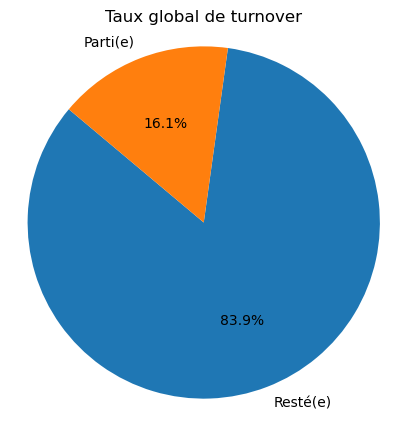

In [120]:
labels = ['Resté(e)', 'Parti(e)']
sizes = df['Attrition'].value_counts().sort_index()
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Taux global de turnover")
plt.axis('equal')
plt.show()

Environ 16 % des employés ont quitté l’entreprise, contre 84 % qui sont restés. Cela signifie que le phénomène de turnover reste relativement limité mais bien présent. Il est donc important de comprendre ce qui motive ces départs pour éviter qu’ils ne s’intensifient, surtout dans les fonctions clés.

##### Les zones à risque 

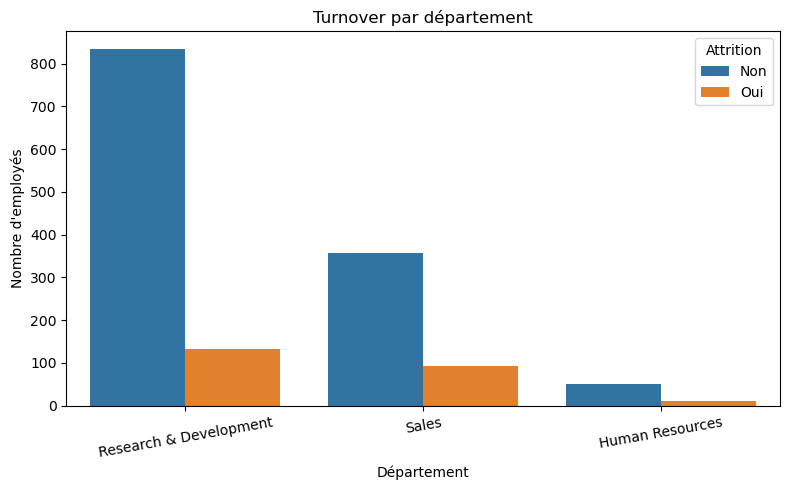

In [121]:
plt.figure(figsize=(8,5))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Turnover par département")
plt.xlabel("Département")
plt.ylabel("Nombre d'employés")
plt.legend(title="Attrition", labels=["Non", "Oui"])
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

Le département R&D présente un taux de départ plus élevé, suivi de Sales. Cela peut indiquer un manque d’opportunités d’évolution ou un problème de satisfaction spécifique

#### L’impact du bien-être au travail sur les départs

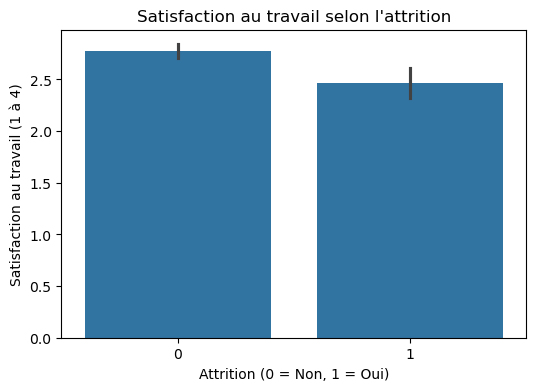

In [122]:
plt.figure(figsize=(6,4))
sns.barplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title("Satisfaction au travail selon l'attrition")
plt.xlabel("Attrition (0 = Non, 1 = Oui)")
plt.ylabel("Satisfaction au travail (1 à 4)")
plt.show()

Les employés qui ont quitté l’entreprise (Attrition = 1) présentent en moyenne une satisfaction au travail plus faible que ceux restés (Attrition = 0). Cette différence suggère un lien direct entre le niveau de satisfaction et le risque de départ. Cela met en lumière l’importance de mesurer régulièrement la satisfaction et d’agir en amont via des leviers comme l’écoute, la reconnaissance et l’évolution professionnelle.

#### Ancienneté (YearsAtCompany) par statut d’attrition

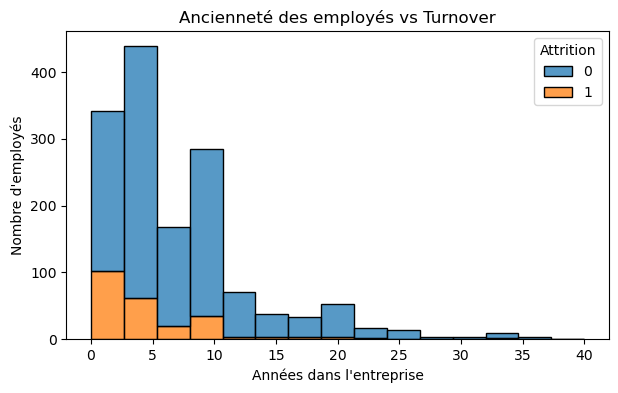

In [123]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', bins=15)
plt.title("Ancienneté des employés vs Turnover")
plt.xlabel("Années dans l'entreprise")
plt.ylabel("Nombre d'employés")
plt.show()

Les départs sont largement concentrés durant les trois premières années d’ancienneté. Au-delà de ce cap, les collaborateurs ont tendance à rester durablement, avec très peu de turnover passé 5 ans. Ce constat souligne un enjeu majeur autour de l’intégration et de l’accompagnement des nouvelles recrues : les premières années sont clairement décisives. Il est donc essentiel de renforcer l’onboarding, le suivi managérial et les perspectives d’évolution dès l’entrée dans l’entreprise.

Cela signifie que les premières années sont critiques : il faut travailler l’onboarding

#### OverTime (heures sup) et Turnover

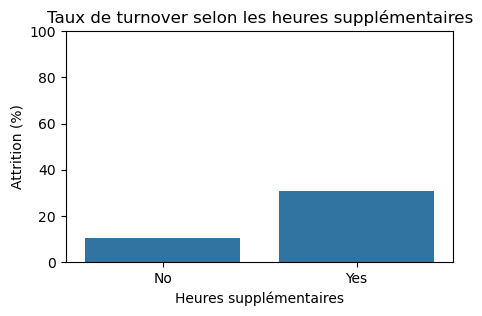

In [124]:
overtime_stats = df.groupby('OverTime')['Attrition'].mean() * 100

plt.figure(figsize=(5,3))
sns.barplot(x=overtime_stats.index, y=overtime_stats.values)
plt.title("Taux de turnover selon les heures supplémentaires")
plt.ylabel("Attrition (%)")
plt.xlabel("Heures supplémentaires")
plt.ylim(0, 100)
plt.show()

Les collaborateurs qui effectuent des heures supplémentaires ont un taux de départ nettement plus élevé que ceux qui n’en font pas. On dépasse les 25 % de turnover chez ceux qui travaillent au-delà de leurs horaires, contre moins de 10 % chez les autres. Ce chiffre interpelle : il suggère une surcharge potentielle, voire un risque de burn-out. C’est un signal fort pour les RH et les managers sur l’importance de l’équilibre vie pro/perso et d’une charge de travail soutenable.

###  Les corrélations fortes

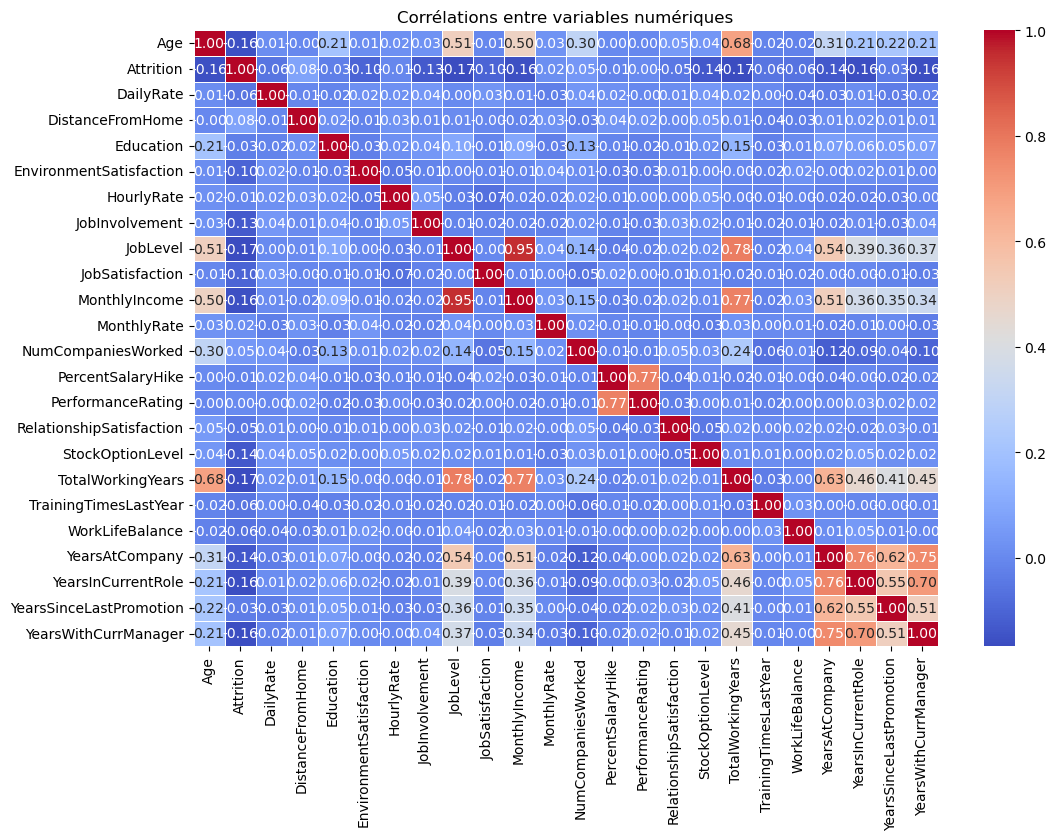

In [125]:
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include='number').corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Corrélations entre variables numériques")
plt.show()

TotalWorkingYears est très corrélé avec Age et MonthlyIncome : plus on est âgé, plus on a d’ancienneté et un revenu élevé.

#### Taux d'attrition par niveau de satisfaction

In [126]:
# attrition rate in % for each job satisfaction level
job_satisfaction = df.groupby('JobSatisfaction')['Attrition'].mean() * 100  # mean of Attrition (1/0) gives percentage who left
print(job_satisfaction)

JobSatisfaction
1    22.866894
2    16.312057
3    16.441441
4    11.279826
Name: Attrition, dtype: float64


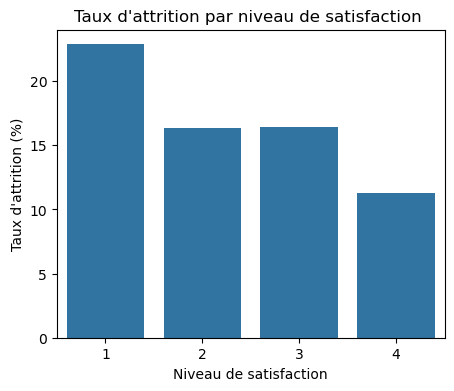

In [127]:
job_df = job_satisfaction.reset_index(name='AttritionRate')
plt.figure(figsize=(5,4))
sns.barplot(x='JobSatisfaction', y='AttritionRate', data=job_df)
plt.title("Taux d'attrition par niveau de satisfaction ")
plt. ylabel("Taux d'attrition (%)")
plt.xlabel("Niveau de satisfaction")
plt.show()

les employés insatisfaits partent plus souvent. Ceux qui se situent au niveau 1 de satisfaction ont un taux d'attrition environ deux fois plus élevé que ceux qui se situent au niveau 4

# Encoding categorical data

In [129]:
# One-hot encode categorical feature columns
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 
                    'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

## Predictive Modeling

In [130]:
X = df.drop('Attrition', axis=1)   # features after encoding
y = df['Attrition'] 

In [131]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,18,230,3,3,3,54,3,1,3,1420,...,True,False,False,False,False,False,False,False,True,False
1,18,812,10,3,4,69,2,1,3,1200,...,False,False,False,False,False,False,True,False,True,False
2,18,1306,5,3,2,69,3,1,2,1878,...,False,False,False,False,False,False,True,False,True,True
3,18,287,5,2,2,73,3,1,4,1051,...,False,False,False,False,True,False,False,False,True,False
4,18,247,8,1,3,80,3,1,3,1904,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,60,422,7,3,1,41,3,5,1,19566,...,False,True,False,False,False,False,False,True,False,False
1476,60,1499,28,3,3,80,2,3,1,10266,...,False,False,False,False,False,True,False,True,False,False
1477,60,1179,16,4,1,84,3,2,1,5405,...,False,False,False,False,False,True,False,False,True,False
1478,60,696,7,4,2,52,4,2,4,5220,...,False,False,False,False,False,True,False,False,False,True


In [132]:
y

0       1
1       0
2       1
3       0
4       1
       ..
1475    0
1476    0
1477    0
1478    0
1479    0
Name: Attrition, Length: 1480, dtype: int64

Division des données 80 % train, 20 % test

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Initialisation et entraînement du modèle Random Forest

In [134]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Prédiction sur l'ensemble de test

In [135]:
y_pred = clf.predict(X_test)

In [136]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

### Evaluation du modèle

In [137]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Stayed (No)', 'Left (Yes)']))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       248
           1       0.90      0.19      0.31        48

    accuracy                           0.86       296
   macro avg       0.88      0.59      0.62       296
weighted avg       0.87      0.86      0.83       296

              precision    recall  f1-score   support

 Stayed (No)       0.86      1.00      0.93       248
  Left (Yes)       0.90      0.19      0.31        48

    accuracy                           0.86       296
   macro avg       0.88      0.59      0.62       296
weighted avg       0.87      0.86      0.83       296



La précision du modèle est d'environ 86-87% sur l'ensemble de test mais comme on pouvait s'y attendre en raison du déséquilibre des classes, le modèle prédit beaucoup mieux la classe majoritaire (0 = restée) que la classe minoritaire (1 = gauche). Plus précisément :
 - Pour les employés qui sont restés (classe 0), la précision est de 0,86 et le rappel est de 1,00 (le modèle a correctement identifié tous les employés qui sont restés dans l'ensemble de test).
 - Pour les employés qui sont partis (classe 1), la précision est de 1,00 mais le rappel n'est que de 0,19. Cela signifie que le modèle n'a identifié que 19 % des employés qui sont réellement partis, et n'a pas identifié les quelque 81 % restants. La précision élevée (1) pour la classe 1 dans ce résultat indique que lorsque le modèle prédit que quelqu'un va partir, il est correct à chaque fois (aucun faux positif dans cette exécution particulière), mais il fait rarement cette prédiction (donc beaucoup de faux négatifs).

In [138]:
# Extraire l'importance des variables
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
# Garder les 10 plus importantes
top10_features = feature_importances.sort_values(ascending=False).head(10)

In [139]:
print("Top 10 des variables les plus influentes :")
print(top10_features)

Top 10 des variables les plus influentes :
MonthlyIncome           0.073396
DailyRate               0.059143
MonthlyRate             0.054177
Age                     0.054167
TotalWorkingYears       0.050064
DistanceFromHome        0.049605
OverTime_Yes            0.048466
HourlyRate              0.046699
YearsAtCompany          0.039987
YearsWithCurrManager    0.038267
dtype: float64


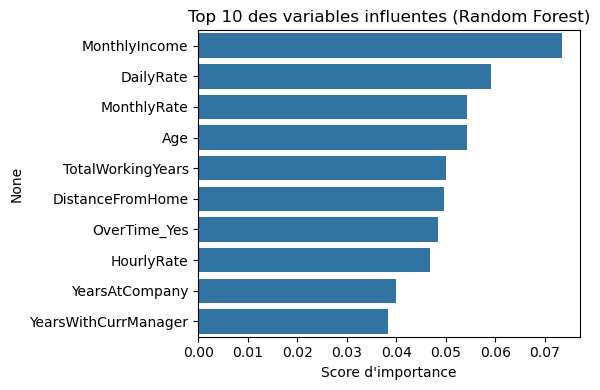

In [140]:
plt.figure(figsize=(6, 4))
sns.barplot(x=top10_features.values, y=top10_features.index)
plt.title("Top 10 des variables influentes (Random Forest)")
plt.xlabel("Score d'importance")
plt.tight_layout()
plt.show()

# SMOTE

C’est une méthode d’équilibrage des classes utilisée quand une classe est sous-représentée. Il permet de génèrer des exemples synthétiques de la classe minoritaire


In [141]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [142]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [143]:
print("Avant SMOTE :", y_train.value_counts())
print("Après SMOTE :", y_train_resampled.value_counts())

Avant SMOTE : Attrition
0    994
1    190
Name: count, dtype: int64
Après SMOTE : Attrition
0    994
1    994
Name: count, dtype: int64


In [144]:
# Réentraîner le modèle avec les données équilibrées
clf.fit(X_train_resampled, y_train_resampled)

# Évaluation sur le jeu de test (inchangé)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       248
           1       0.75      0.38      0.50        48

    accuracy                           0.88       296
   macro avg       0.82      0.68      0.72       296
weighted avg       0.87      0.88      0.86       296



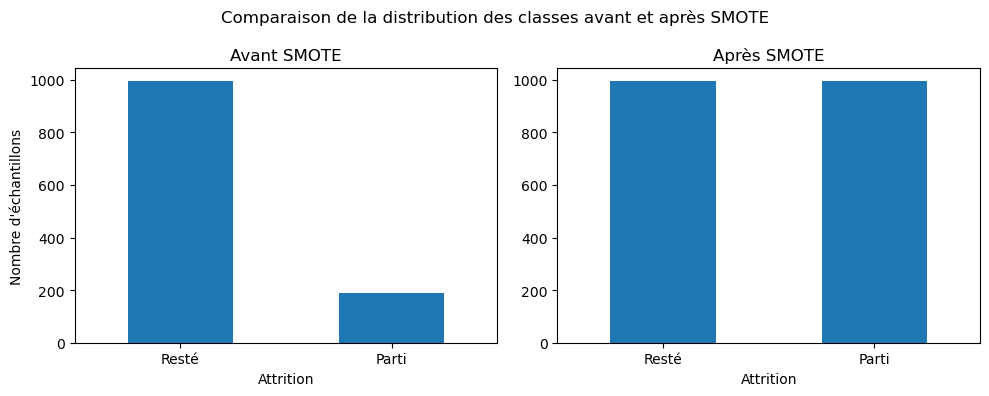

In [145]:
import matplotlib.pyplot as plt

# Créer deux graphiques côte à côte
plt.figure(figsize=(10, 4))

# Graphique 1 : avant SMOTE
plt.subplot(1, 2, 1)
y_train.value_counts().sort_index().plot(kind='bar')
plt.title("Avant SMOTE")
plt.xticks(ticks=[0, 1], labels=['Resté', 'Parti'], rotation=0)
plt.ylabel("Nombre d'échantillons")

# Graphique 2 : après SMOTE
plt.subplot(1, 2, 2)
y_train_resampled.value_counts().sort_index().plot(kind='bar')
plt.title("Après SMOTE")
plt.xticks(ticks=[0, 1], labels=['Resté', 'Parti'], rotation=0)

plt.suptitle("Comparaison de la distribution des classes avant et après SMOTE")
plt.tight_layout()
plt.show()

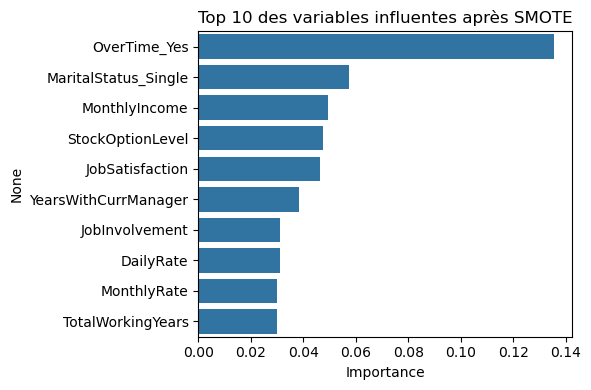

In [146]:
import seaborn as sns
import pandas as pd

# Importance des variables
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)

# Top 10
top10 = feature_importances.sort_values(ascending=False).head(10)

# Affichage
plt.figure(figsize=(6, 4))
sns.barplot(x=top10.values, y=top10.index)
plt.title("Top 10 des variables influentes après SMOTE")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Comme les départs étaient beaucoup moins nombreux que les employés restés, j’ai utilisé SMOTE pour rééquilibrer les données. Cela a permis au modèle de mieux apprendre à repérer les personnes susceptibles de quitter l’entreprise.

# XGBOOST

C’est un algorithme de Machine Learning basé sur les arbres de décision, optimisé pour la précision, la vitesse et le contrôle du surapprentissage. Comme il permet de faire du boosting, Chaque arbre corrige les erreurs du précédent.

In [147]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [148]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialiser le modèle XGBoost
xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss')

# Entraînement sur les données équilibrées
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Prédiction sur le jeu de test
y_pred_xgb = xgb_clf.predict(X_test)

# Rapport de classification
print("Résultats XGBoost :")
print(classification_report(y_test, y_pred_xgb))

Résultats XGBoost :
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       248
           1       0.76      0.40      0.52        48

    accuracy                           0.88       296
   macro avg       0.83      0.69      0.73       296
weighted avg       0.87      0.88      0.87       296



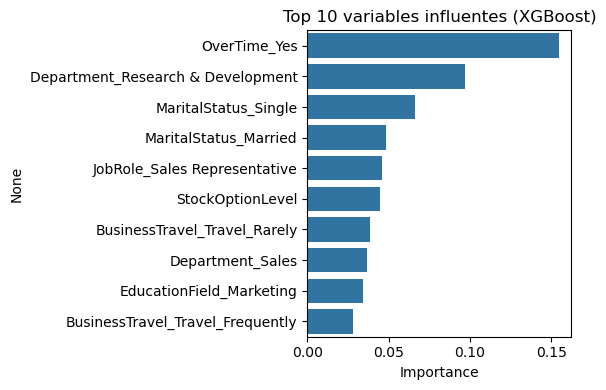

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importance des variables
xgb_importance = pd.Series(xgb_clf.feature_importances_, index=X_train.columns)
top10_xgb = xgb_importance.sort_values(ascending=False).head(10)

# Affichage
plt.figure(figsize=(6, 4))
sns.barplot(x=top10_xgb.values, y=top10_xgb.index)
plt.title("Top 10 variables influentes (XGBoost)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Interprétation des variables influentes

L’analyse des trois modèles (RandomForestClassifier, Random Forest avec SMOTE et XGBoostClassifier) met en lumière les variables les plus déterminantes dans la prédiction de l’attrition (Attrition). Certaines apparaissent de manière récurrente, d’autres varient en fonction de la méthode utilisée. Voici les principaux enseignements qu’on peut en tirer.

OverTime_Yes : un signal clair de surcharge

Le fait qu’un employé fasse des heures supplémentaires (OverTime_Yes) est le facteur le plus prédictif du départ dans les modèles SMOTE et XGBoost, et figure aussi dans le top 10 du modèle Random Forest standard. Cela reflète une surcharge de travail qui, sur le long terme, peut générer de la fatigue, du stress, voire du désengagement. C’est un indicateur à surveiller de près pour prévenir le burnout et favoriser un meilleur équilibre de vie.

MonthlyIncome : un levier classique mais toujours central

Le salaire mensuel (MonthlyIncome) est également très influent, notamment dans le modèle Random Forest initial. Une rémunération perçue comme insuffisante ou inéquitable peut nourrir une insatisfaction et renforcer l’intention de départ. Même si le salaire n’est pas le seul levier de fidélisation, il reste un facteur clé à considérer dans une politique RH équilibrée.

MaritalStatus_Single : un profil plus mobile ?

Le fait d’être célibataire (MaritalStatus_Single) est fortement associé au risque d’attrition dans les modèles équilibrés (SMOTE et XGBoost). Il est possible que les personnes célibataires soient plus enclines à la mobilité géographique ou professionnelle, et donc plus susceptibles de quitter leur poste. Ce n’est pas un facteur déterminant en soi, mais il peut aider à mieux comprendre certains comportements dans des groupes de collaborateurs.

YearsWithCurrManager : la stabilité managériale protège

Le nombre d’années passées avec le même manager (YearsWithCurrManager) revient régulièrement comme une variable importante, notamment après application de SMOTE. Cela confirme un élément souvent observé sur le terrain : plus la relation avec le manager est stable et de qualité, plus le collaborateur a tendance à rester. Un bon encadrement est un levier fort de fidélisation.

Le cas de Age : présent, puis absent

Dans le modèle Random Forest de base, l’âge (Age) apparaît comme une variable significative. Cela peut s’expliquer par le fait que les employés plus jeunes ont en moyenne des comportements de mobilité plus marqués. Mais une fois qu’on applique SMOTE ou qu’on utilise un modèle plus sophistiqué comme XGBoost, cette variable devient beaucoup moins importante. Pourquoi ? Parce que l’âge est souvent corrélé à d’autres variables plus explicites : TotalWorkingYears, YearsAtCompany, ou YearsWithCurrManager. Une fois ces dimensions prises en compte, l’âge n’apporte plus beaucoup d’information à lui seul.

D’autres variables à surveiller

Le modèle XGBoost met aussi en avant des variables organisationnelles comme :
	•	Department_Sales ou Department_R&D : certains départements sont plus exposés que d’autres.
	•	JobRole_Sales Representative : certaines fonctions commerciales présentent des taux de turnover plus élevés.
	•	BusinessTravel_Frequently : des déplacements fréquents peuvent générer de la fatigue ou du désengagement.



# En résumé

Les variables les plus influentes confirment que l’attrition ne repose pas sur un seul facteur mais sur une combinaison d’éléments personnels, professionnels et organisationnels. Parmi les plus importants : la surcharge de travail (OverTime_Yes), la rémunération (MonthlyIncome), la stabilité managériale (YearsWithCurrManager), le profil personnel (MaritalStatus) et la fonction occupée (JobRole). Ces insights peuvent orienter des actions RH plus ciblées pour améliorer la rétention et le bien-être au travail.